<a href="https://colab.research.google.com/github/deeplearning-itba/Object-Detection/blob/master/100-yolo_prediction-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/yolo_helper.py
! wget https://github.com/lab-ml-itba/9-YOLO-intro/raw/master/ladybugs_3.jpg
! wget https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/Object_Detection.py

--2019-09-19 19:53:06--  https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/yolo_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28832 (28K) [text/plain]
Saving to: ‘yolo_helper.py’

yolo_helper.py      100%[===================>]  28.16K  --.-KB/s    in 0.01s   

2019-09-19 19:53:11 (2.31 MB/s) - ‘yolo_helper.py’ saved [28832/28832]

--2019-09-19 19:53:12--  https://github.com/lab-ml-itba/9-YOLO-intro/raw/master/ladybugs_3.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/ladybugs_3.jpg [following]
--2019-09-19 19:53:12--  https://raw.githubu

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Pesos de la red entrenada:
Hacer click y agregar al drive personal:
 
https://drive.google.com/open?id=1Nzz6UnVx1qCRQ8I6NhL1L8O0gtlvFxwp

In [4]:
from PIL import Image
from yolo_helper import plot_batch_with_predictions, get_YOLO_V2_NN, plot_bboxes, getIUO
from Object_Detection import ObjectDectection
import numpy as np

Using TensorFlow backend.


In [0]:
classes_names = {
    'n02165456': 'Vaquita de san antonio',
    'n02226429': 'grillo',
    'n01644373': 'sapo',
    'n02279972': 'mariposa',
    'n01632458': 'salamandra',
    'n02256656': 'chicharra',
    'n01774384': 'viuda negra',
    'n01770393': 'escorpion'
}
idx_2_class_id = {0: 'n02165456',
 1: 'n02226429',
 2: 'n01644373',
 3: 'n02279972',
 4: 'n01632458',
 5: 'n02256656',
 6: 'n01774384',
 7: 'n01770393'}

406 642


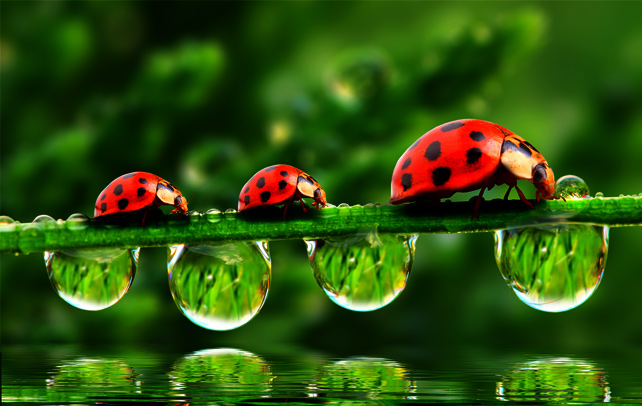

In [6]:
image = Image.open('ladybugs_3.jpg')
print(image.height, image.width)
image

In [7]:
from yolo_helper import get_YOLO_V2_NN
n_classes = len(classes_names)
GRID_H,  GRID_W  = int(np.round(image.height / 32)) , int(np.round(image.width / 32))
IMAGE_H, IMAGE_W = GRID_H*32, GRID_W*32
target_size = (IMAGE_H, IMAGE_W)

BOX = 1
CLASS = n_classes

object_detection = ObjectDectection(n_classes, IMAGE_H, IMAGE_W, BOX, ARQUITECTURE='YOLO_V2')
model = object_detection.model

print(IMAGE_H, IMAGE_W)
print(GRID_H,  GRID_W)
model.layers[-1].output








416 640
13 20


<tf.Tensor 'reshape_1/Reshape:0' shape=(?, 13, 20, 1, 13) dtype=float32>

In [0]:
model.load_weights('/content/drive/My Drive/weights_yolo_loss_bigger_dataset.hdf5') 

In [0]:
image_array = np.array(image.resize([IMAGE_W,IMAGE_H])).reshape(1, IMAGE_H, IMAGE_W, 3)/255

In [0]:
predictions = model.predict(image_array)

In [11]:
predictions.shape

(1, 13, 20, 1, 13)

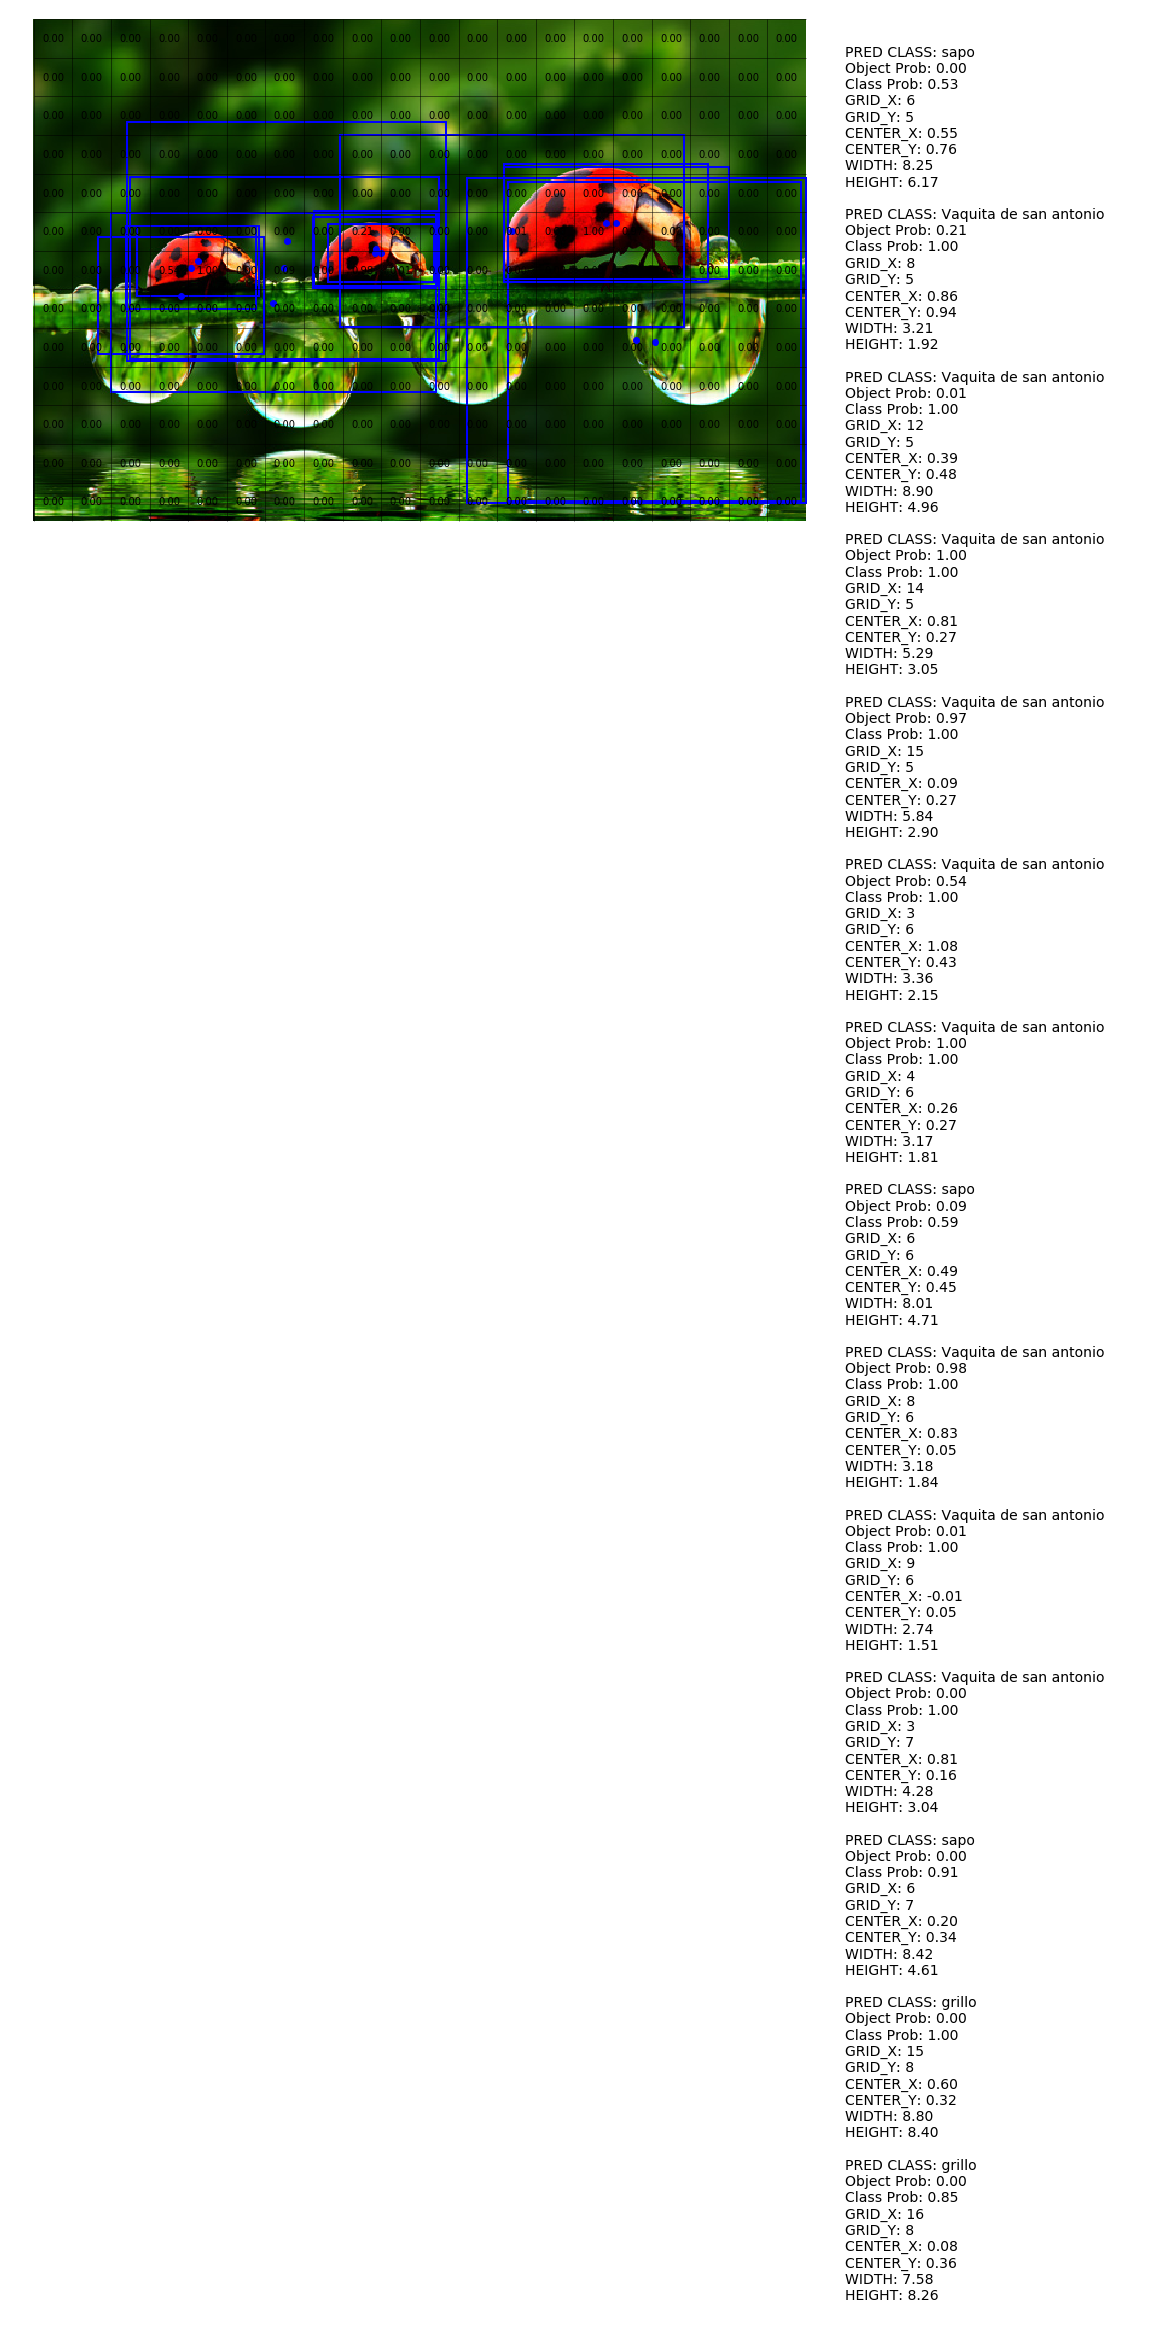

In [12]:
pred_processed = plot_bboxes(image_array[0], predictions[0], idx_2_class_id, classes_names, thres=0.001)